In [51]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression


pd.options.mode.chained_assignment = None

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

df = pd.read_csv (r'/Users/danieldibenedetto/Downloads/sample_clean.csv')

df2 = pd.read_csv (r'/Users/danieldibenedetto/Downloads/demographics.csv')

df.head()

,ADDRESS,ASSESSED_VALUE,ASSESSMENT_CLASS,ASSESSMENT_CLASS_DESCRIPTION,COMM_CODE,COMM_NAME,LATITUDE,LONGITUDE,ROLL_NUMBER,Year,...,inc2,inc3,inc4,own1,own2,own3,own4,lab1,lab2,lab3
0,4 SADDLEMEAD RD NE,343500.0,RE,Residential,SAD,SADDLE RIDGE,51.126750,-113.944255,4017208,2017,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
1,4 SADDLEMEAD RD NE,345500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2018,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
2,4 SADDLEMEAD RD NE,323500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2019,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
3,4 SADDLEMEAD RD NE,315500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2020,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
4,70 SADDLEBACK RD NE,393500.0,RE,Residential,SAD,SADDLE RIDGE,51.128776,-113.948802,4034203,2017,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286


In [52]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
drop = ['ADDRESS', 'COMM_NAME', 'LATITUDE', 'LONGITUDE', 'location']
df.drop(drop,inplace=True,axis=1)
df.head()

,ASSESSED_VALUE,COMM_CODE,ROLL_NUMBER,Year,fsa,pct_change,YEAR_OF_CONSTRUCTION,saf1,saf2,saf3,...,inc2,inc3,inc4,own1,own2,own3,own4,lab1,lab2,lab3
0,343500.0,SAD,4017208,2017,T3J,-0.019971,2000.0,281.0,174.0,162.0,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
1,345500.0,SAD,4017208,2018,T3J,0.005822,2000.0,306.0,200.0,112.0,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
2,323500.0,SAD,4017208,2019,T3J,-0.063676,2000.0,333.0,204.0,130.0,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
3,315500.0,SAD,4017208,2020,T3J,-0.024730,2000.0,127.0,94.0,50.0,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
4,393500.0,SAD,4034203,2017,T3J,-0.018703,2001.0,281.0,174.0,162.0,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286


In [53]:
fsa = df["fsa"].unique()
fsadicttemp = {x:x for x in fsa}
fsadict = {x:x for x in fsa}
for x in fsa:
    fsadicttemp[x] = df["fsa"] == x
    fsadict[x] = df[fsadicttemp[x]][['ASSESSED_VALUE', 'COMM_CODE', 'ROLL_NUMBER', 'Year', 'fsa', 'pct_change', 'YEAR_OF_CONSTRUCTION']]

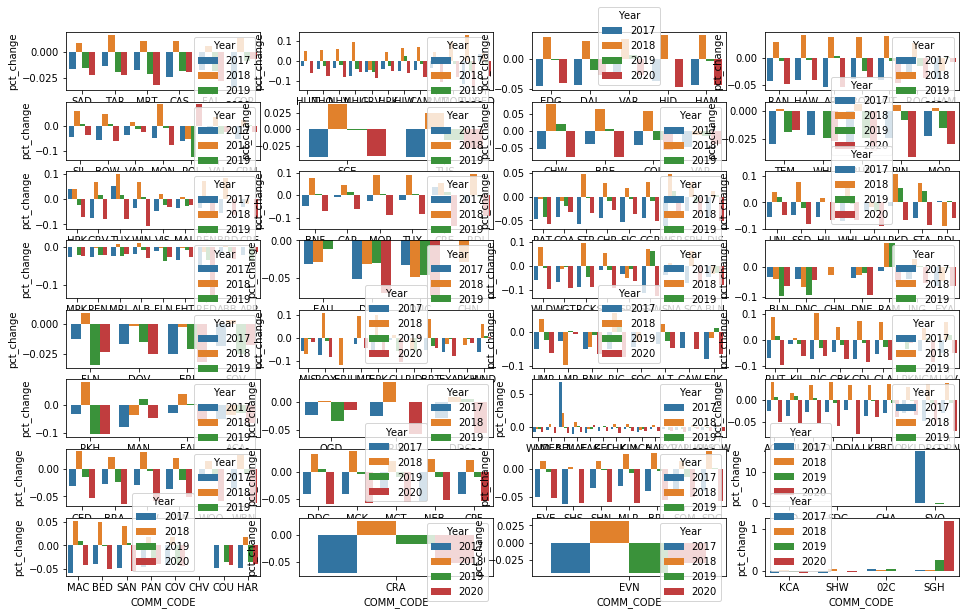

In [54]:
fig, ax = plt.subplots(8,4)
for i,z in enumerate(fsa):
    sns.barplot(data = fsadict[z], x = 'COMM_CODE', y='pct_change',estimator = np.median, hue = 'Year', ci = None,ax = ax[int(i/4)%8,i%4])

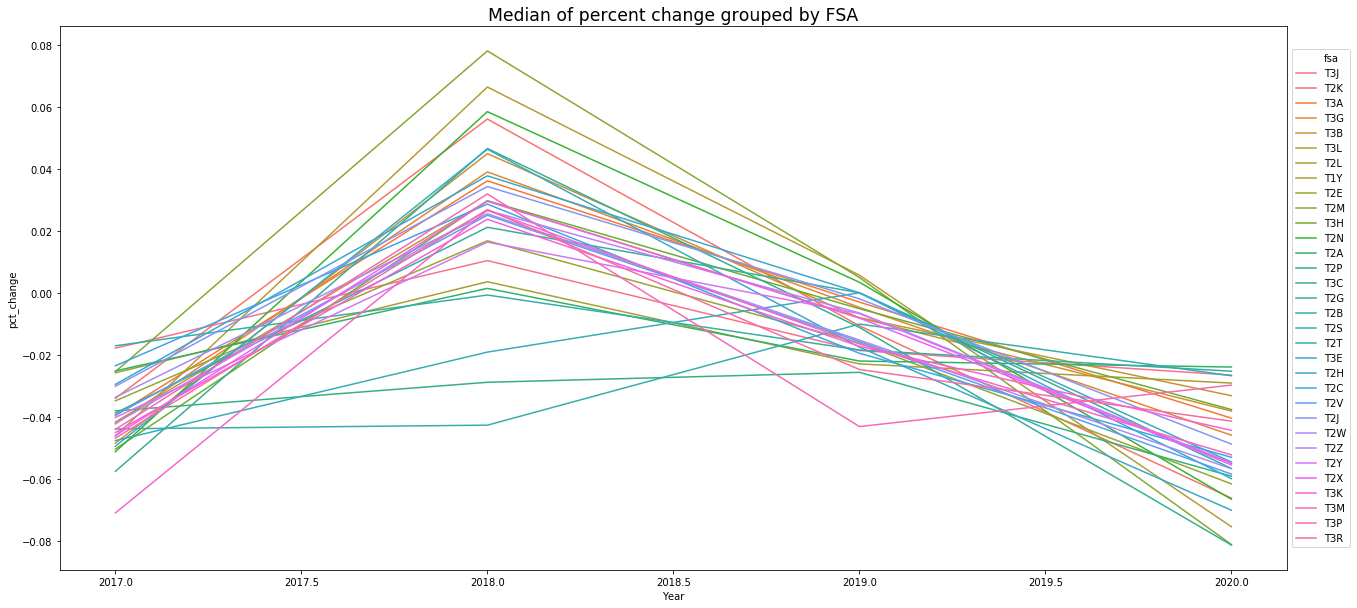

In [55]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('Median of percent change grouped by FSA', fontsize = 'xx-large')
sns.lineplot(data = df, x = 'Year', y = 'pct_change', hue = 'fsa', estimator = 'median', ci=None).legend(loc='center left', bbox_to_anchor=(1, 0.5))

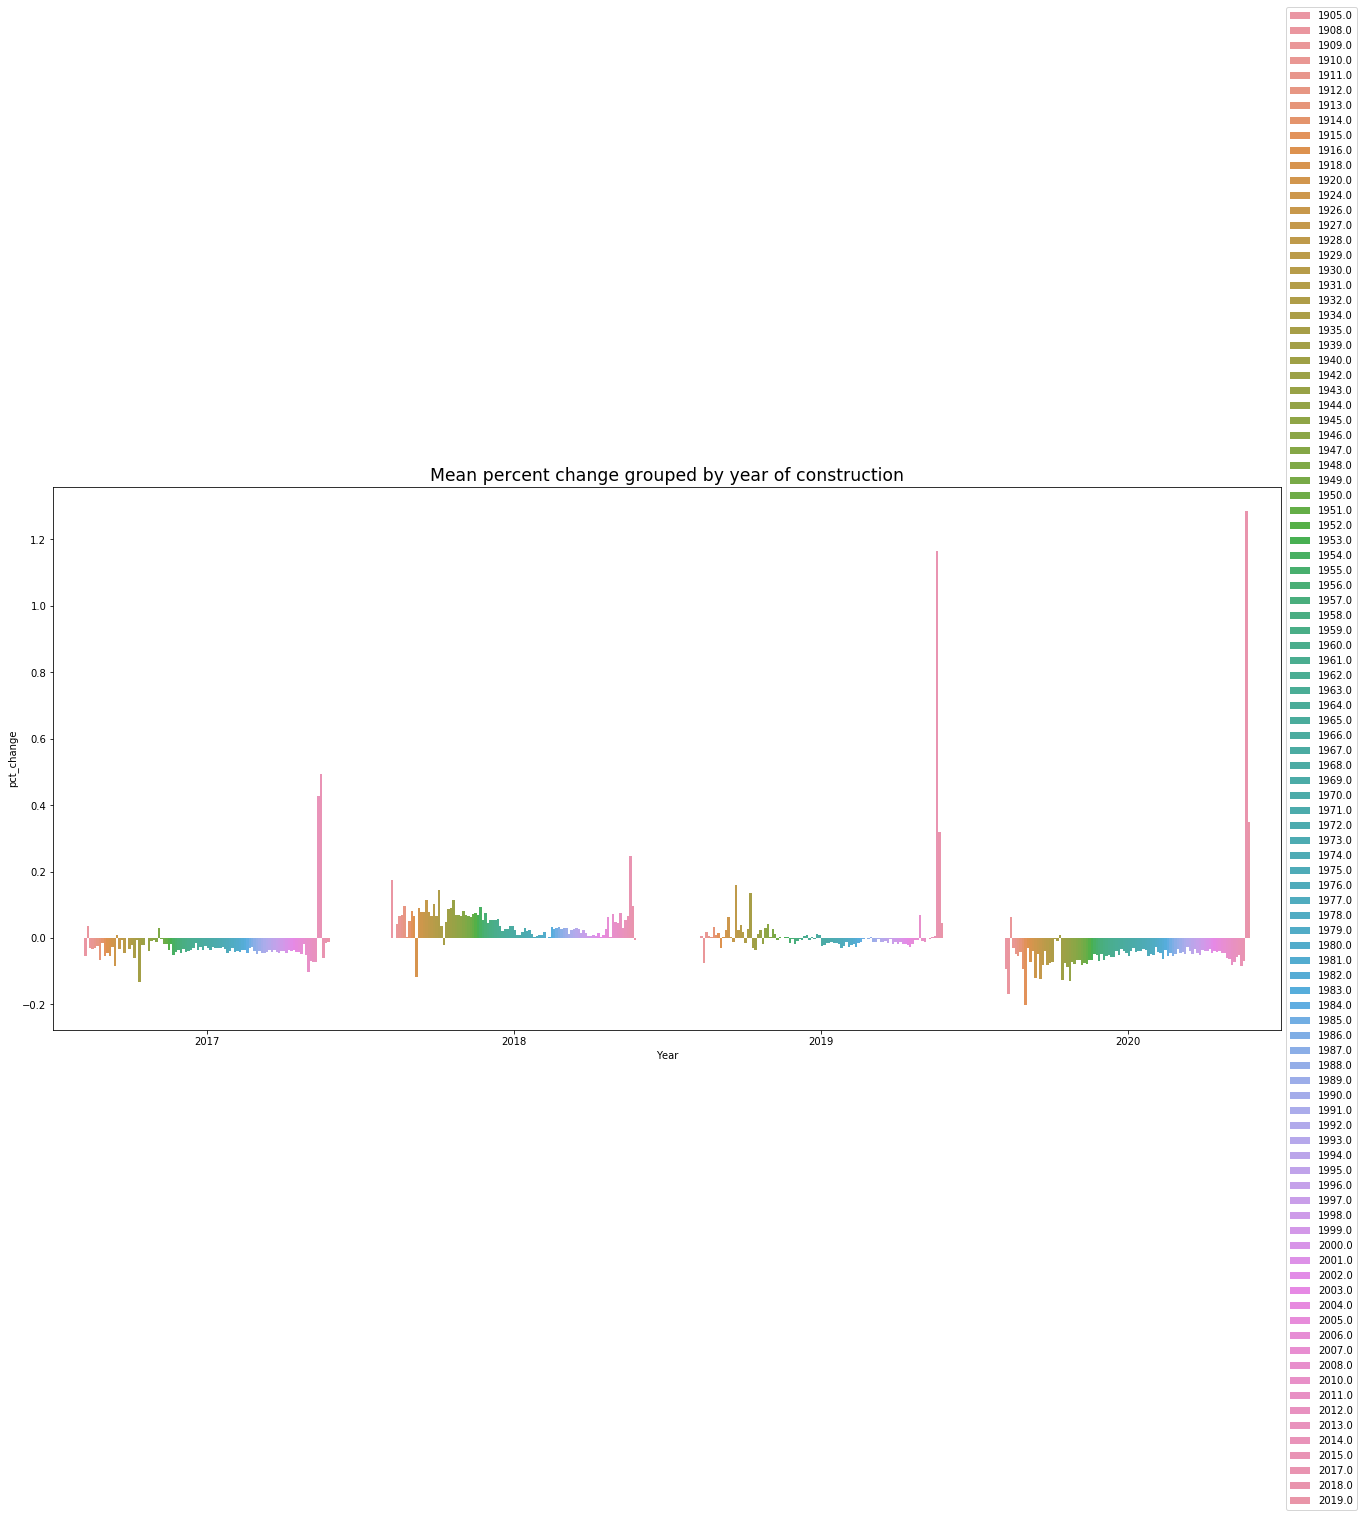

In [56]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('Mean percent change grouped by year of construction', fontsize = 'xx-large')
sns.barplot(data = df, x = 'Year', y = 'pct_change', hue = 'YEAR_OF_CONSTRUCTION', estimator = np.mean, ci=None).legend(loc='center left', bbox_to_anchor=(1, 0.5))

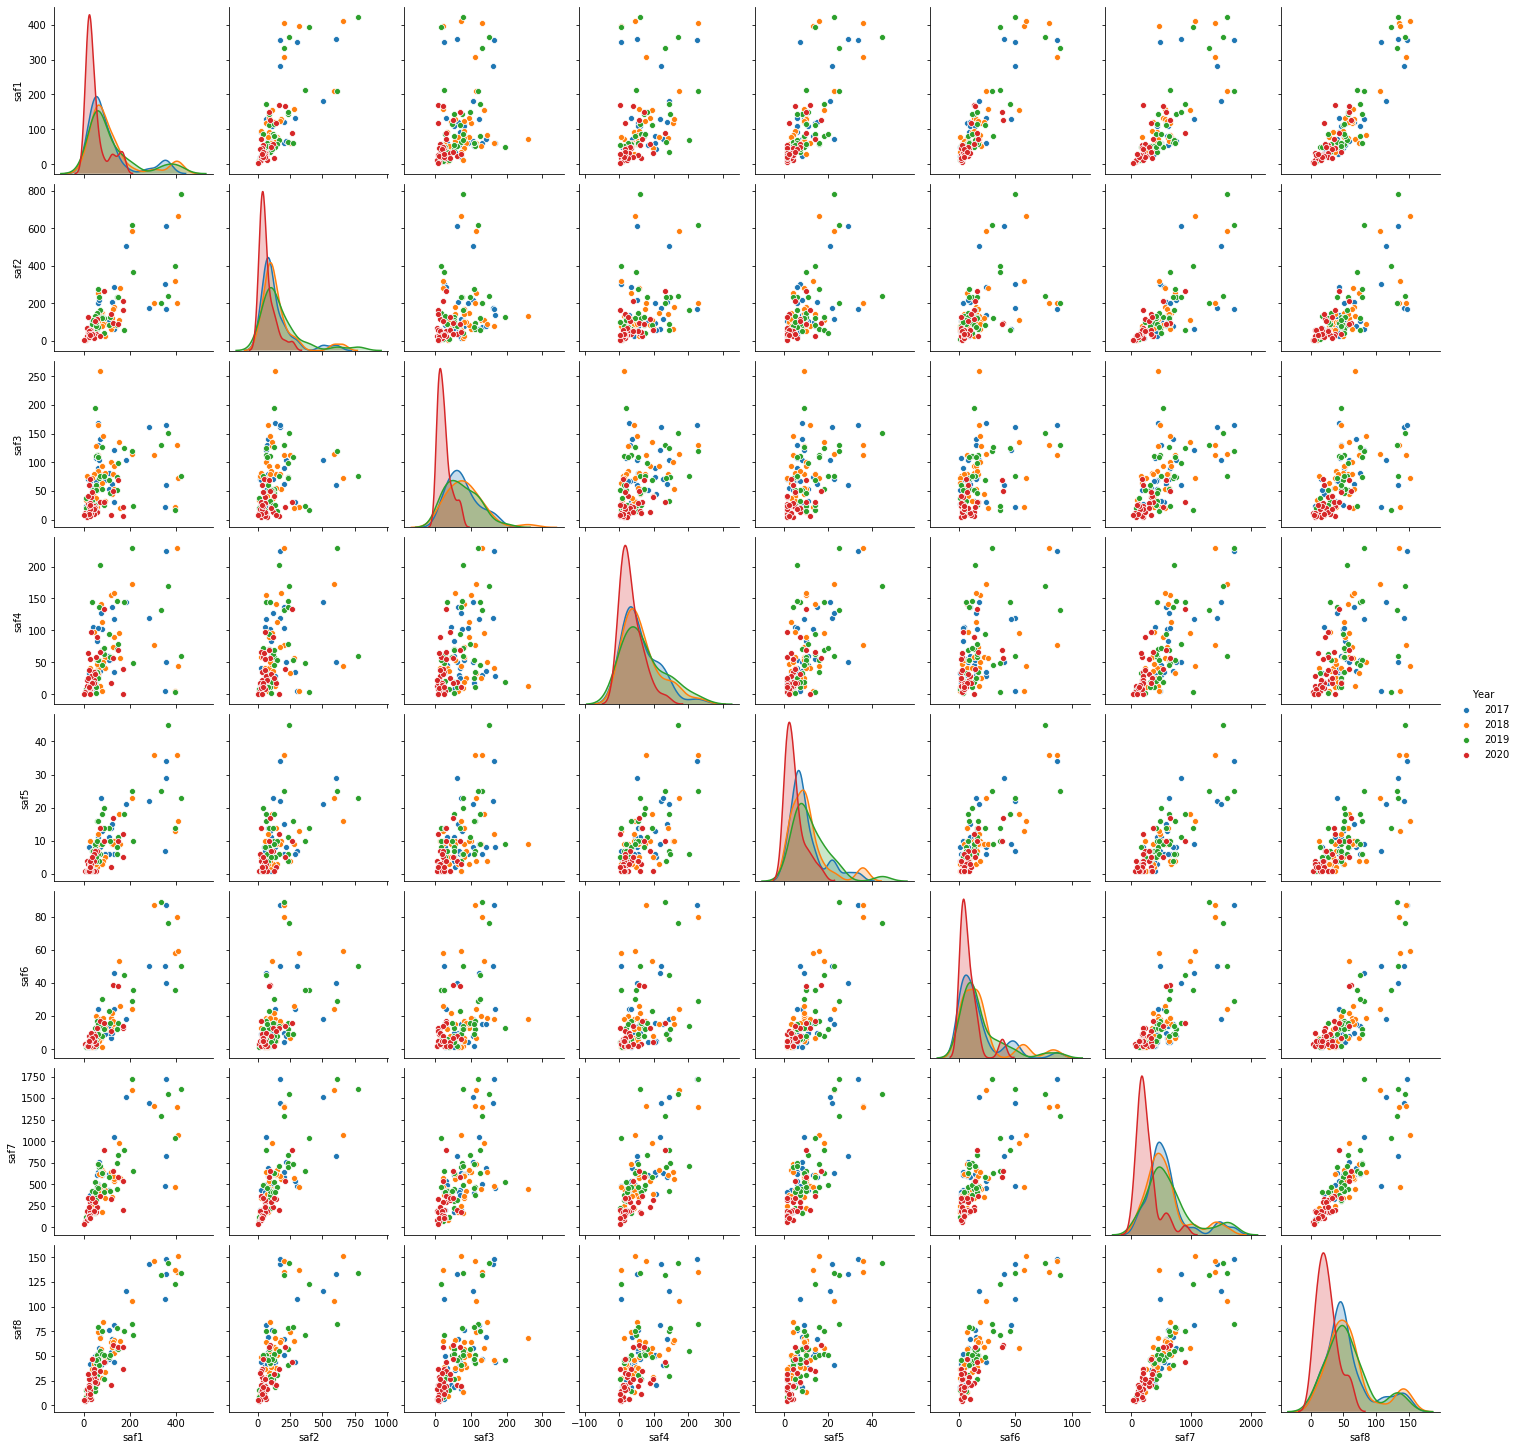

In [57]:
dfsaf = df[['saf1', 'saf2', 'saf3','saf4','saf5','saf6','saf7','saf8','Year','fsa']]
dfsaf = dfsaf.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
sns.pairplot(dfsaf,hue = 'Year')